## basic

In [1]:
#use "topfind";;
#require "owl, jupyter.notebook";;

- : unit = ()
Findlib has been successfully loaded. Additional directives:
  #require "package";;      to load a package
  #list;;                   to list the available packages
  #camlp4o;;                to load camlp4 (standard syntax)
  #camlp4r;;                to load camlp4 (revised syntax)
  #predicates "p,q,...";;   to set these predicates
  Topfind.reset();;         to force that packages will be reloaded
  #thread;;                 to enable threads

- : unit = ()


/home/daiki/.opam/4.11.1/lib/ocaml/unix.cma: loaded
/home/daiki/.opam/4.11.1/lib/ocaml/bigarray.cma: loaded
/home/daiki/.opam/4.11.1/lib/bytes: added to search path
/home/daiki/.opam/4.11.1/lib/integers: added to search path
/home/daiki/.opam/4.11.1/lib/integers/integers.cma: loaded
/home/daiki/.opam/4.11.1/lib/ctypes: added to search path
/home/daiki/.opam/4.11.1/lib/ctypes/ctypes.cma: loaded
/home/daiki/.opam/4.11.1/lib/ctypes/ctypes-top.cma: loaded
/home/daiki/.opam/4.11.1/lib/ocaml/str.cma: loaded
/home/daiki/.opam/4.11.1/lib/ctypes/cstubs.cma: loaded
/home/daiki/.opam/4.11.1/lib/eigen/cpp: added to search path
/home/daiki/.opam/4.11.1/lib/eigen/cpp/eigen_cpp_stubs.cma: loaded
/home/daiki/.opam/4.11.1/lib/eigen: added to search path
/home/daiki/.opam/4.11.1/lib/eigen/eigen.cma: loaded
/home/daiki/.opam/4.11.1/lib/zip: added to search path
/home/daiki/.opam/4.11.1/lib/zip/zip.cma: loaded
/home/daiki/.opam/4.11.1/lib/camlzip: added to search path
/home/daiki/.opam/4.11.1/lib/npy: add

In [2]:
open Owl;;

In [6]:
open Neural.S;;
open Neural.S.Graph;;
open Neural.S.Algodiff;;

In [7]:
let make_network input_shape =
  input input_shape
  |> lambda (fun x -> Maths.(x / F 256.))
  |> conv2d [|5;5;1;32|] [|1;1|] ~act_typ:Activation.Relu
  |> max_pool2d [|2;2|] [|2;2|]
  |> dropout 0.1
  |> fully_connected 1024 ~act_typ:Activation.Relu
  |> linear 10 ~act_typ:Activation.(Softmax 1)
  |> get_network

val make_network : int array -> Owl.Neural.S.Graph.network = <fun>


## Plotting

In [2]:
#require "owl-plplot";;

/home/daiki/.opam/4.11.1/lib/plplot: added to search path
/home/daiki/.opam/4.11.1/lib/plplot/plplot.cma: loaded
/home/daiki/.opam/4.11.1/lib/owl-plplot: added to search path
/home/daiki/.opam/4.11.1/lib/owl-plplot/owl_plplot.cma: loaded


In [3]:
open Owl;;
open Owl_plplot;;

In [4]:
let f x = Maths.sin x /. x in
let h = Plot.create "png/sin.png" in

Plot.set_title h "Function: f(x) = sine x / x";
Plot.set_xlabel h "x-axis";
Plot.set_ylabel h "y-axis";
Plot.set_font_size h 8.;
Plot.set_pen_size h 3.;
Plot.plot_fun ~h f 1. 15.;

Plot.output h;;

- : unit = ()


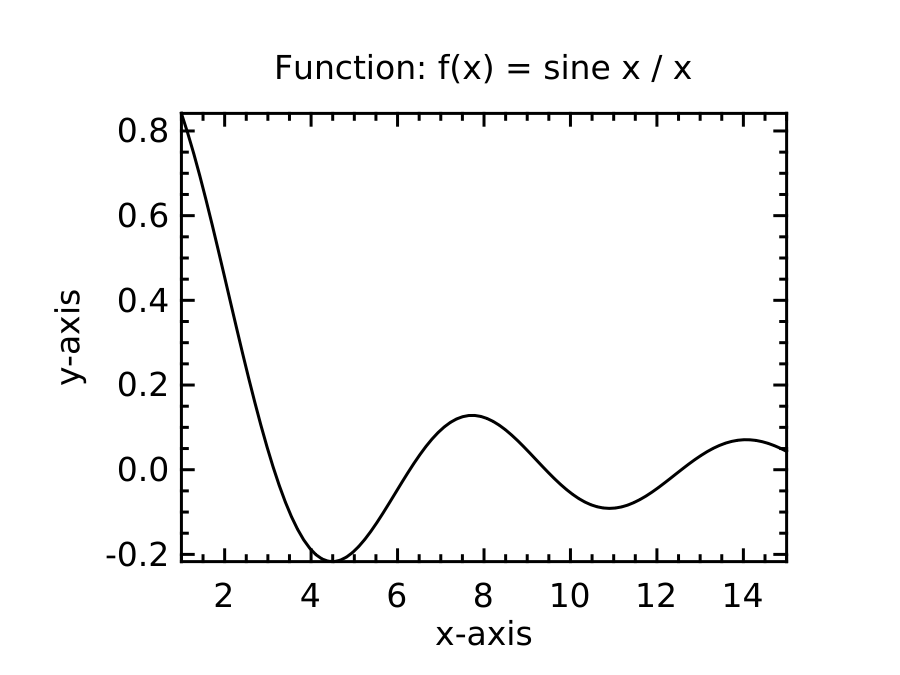

- : Jupyter_notebook.display_id = <abstr>


In [5]:
Jupyter_notebook.display_file ~base64:true "image/png" "png/sin.png"